In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
import tensorflow as tf
from tensorflow import keras as ks
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ='/content/drive/MyDrive/Data_XY.csv'
data = pd.read_csv(path)

In [ ]:
# split into input (X) and output (Y) variables
x = data.iloc[:,:4186]
x = np.array(x)
y = data['y']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape)

(525, 4186)


In [ ]:
from tensorflow import keras as ks

model = ks.Sequential()
model.add(ks.layers.Dense(20, activation=ks.activations.tanh, input_dim =  4186))
model.add(ks.layers.Dense(20, activation=ks.activations.relu))
model.add(ks.layers.Dense(20, activation=ks.activations.softsign))
model.add(ks.layers.Dense(209, activation=ks.activations.softmax))
model.add(ks.layers.Dense(211, activation=ks.activations.tanh))
model.add(ks.layers.Dense(20, activation=ks.activations.tanh))
model.add(ks.layers.Dense(20, activation=ks.activations.tanh))
model.add(ks.layers.Dense(1, activation=ks.activations.linear))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                83740     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 209)               4389      
_________________________________________________________________
dense_4 (Dense)              (None, 211)               44310     
_________________________________________________________________
dense_5 (Dense)              (None, 20)                4240      
_________________________________________________________________
dense_6 (Dense)              (None, 20)                4

In [ ]:
model.compile( loss='mean_squared_error',optimizer='adam',metrics='mse')

In [ ]:
history = model.fit(x_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/150
9/9 [==============================] - 1s 27ms/step - loss: 15.4019 - mse: 15.4019 - val_loss: 13.7667 - val_mse: 13.7667
Epoch 2/150
9/9 [==============================] - 0s 8ms/step - loss: 11.8259 - mse: 11.8259 - val_loss: 9.3693 - val_mse: 9.3693
Epoch 3/150
9/9 [==============================] - 0s 7ms/step - loss: 7.6392 - mse: 7.6392 - val_loss: 5.6981 - val_mse: 5.6981
Epoch 4/150
9/9 [==============================] - 0s 7ms/step - loss: 4.9833 - mse: 4.9833 - val_loss: 4.1926 - val_mse: 4.1926
Epoch 5/150
9/9 [==============================] - 0s 10ms/step - loss: 4.2013 - mse: 4.2013 - val_loss: 3.8692 - val_mse: 3.8692
Epoch 6/150
9/9 [==============================] - 0s 7ms/step - loss: 4.1239 - mse: 4.1239 - val_loss: 3.8601 - val_mse: 3.8601
Epoch 7/150
9/9 [==============================] - 0s 7ms/step - loss: 4.1557 - mse: 4.1557 - val_loss: 3.8467 - val_mse: 3.8467
Epoch 8/150
9/9 [==============================] - 0s 8ms/step - loss: 4.1163 - mse: 4.11

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


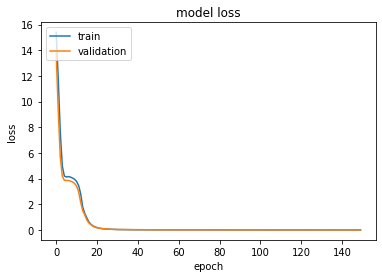

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(x_test)

Text(0.5, 0.98, 'Predictions vs Actual data (FNN Regressor , n_neighbors = 10)')

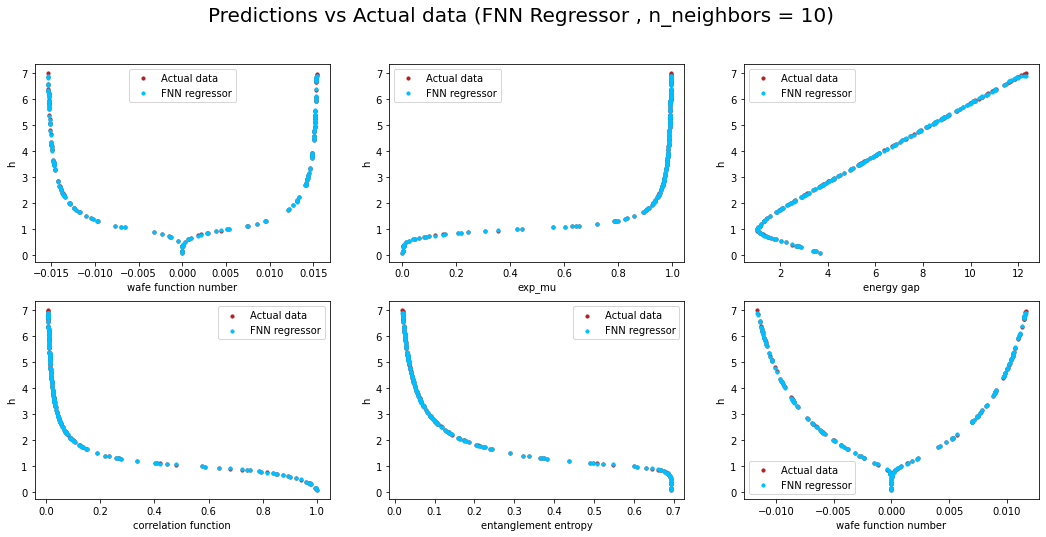

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (FNN Regressor , n_neighbors = 10)",fontsize = 20)

# **Tuning**

In [ ]:
!pip install -q -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 71kB 4.1MB/s 


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def model_fnn(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=20,
                                            max_value=210,
                                            step=10),
                               activation=hp.Choice('act_'+ str(i), ['relu','softmax','tanh'])))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',values = [0.1,0.001,0.0001])),
        loss='mean_squared_error',
        metrics=['mean_squared_error'])
    return model

In [ ]:
tuner = RandomSearch(
    model_fnn,
    objective='val_mean_squared_error',
    max_trials=5,
    executions_per_trial=3,
    directory='new_project')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 210, 'step': 10, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'softmax', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 210, 'step': 10, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'softmax', 'tanh'], 'ordered': False}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(x_train, y_train,
             epochs=150,
             batch_size = 30,
             validation_data=(x_test, y_test))

Trial 5 Complete [00h 01m 50s]
val_mean_squared_error: 3.459893067677816

Best val_mean_squared_error So Far: 5.041274198447354e-05
Total elapsed time: 00h 08m 25s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in new_project/untitled_project
Showing 10 best trials
Objective(name='val_mean_squared_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 170
act_0: relu
units_1: 170
act_1: softmax
learning_rate: 0.001
units_2: 130
act_2: relu
units_3: 90
act_3: tanh
units_4: 90
act_4: tanh
units_5: 30
act_5: tanh
units_6: 60
act_6: softmax
units_7: 70
act_7: tanh
Score: 5.041274198447354e-05
Trial summary
Hyperparameters:
num_layers: 8
units_0: 50
act_0: tanh
units_1: 80
act_1: tanh
learning_rate: 0.001
units_2: 20
act_2: relu
units_3: 20
act_3: relu
units_4: 20
act_4: relu
units_5: 20
act_5: relu
units_6: 20
act_6: relu
units_7: 20
act_7: relu
Score: 6.592614954570308e-05
Trial summary
Hyperparameters:
num_layers: 6
units_0: 160
act_0: tanh
units_1: 160
act_1: tanh
learning_rate: 0.1
units_2: 110
act_2: tanh
units_3: 60
act_3: softmax
units_4: 50
act_4: tanh
units_5: 90
act_5: relu
units_6: 130
act_6: tanh
units_7: 170
act_7: softmax
Score: 3.4598

In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
history = best_model.fit(x_train, y_train, epochs=150, batch_size=30,  verbose=1, validation_split=0.2)

Epoch 1/150
14/14 [==============================] - 0s 11ms/step - loss: 4.4139e-05 - mean_squared_error: 4.4139e-05 - val_loss: 5.5733e-05 - val_mean_squared_error: 5.5733e-05
Epoch 2/150
14/14 [==============================] - 0s 9ms/step - loss: 6.1552e-05 - mean_squared_error: 6.1552e-05 - val_loss: 9.5337e-05 - val_mean_squared_error: 9.5337e-05
Epoch 3/150
14/14 [==============================] - 0s 10ms/step - loss: 6.3373e-05 - mean_squared_error: 6.3373e-05 - val_loss: 4.9081e-05 - val_mean_squared_error: 4.9081e-05
Epoch 4/150
14/14 [==============================] - 0s 12ms/step - loss: 6.6589e-05 - mean_squared_error: 6.6589e-05 - val_loss: 3.5734e-05 - val_mean_squared_error: 3.5734e-05
Epoch 5/150
14/14 [==============================] - 0s 12ms/step - loss: 1.3965e-04 - mean_squared_error: 1.3965e-04 - val_loss: 2.6643e-04 - val_mean_squared_error: 2.6643e-04
Epoch 6/150
14/14 [==============================] - 0s 9ms/step - loss: 8.1262e-04 - mean_squared_error: 8.126

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


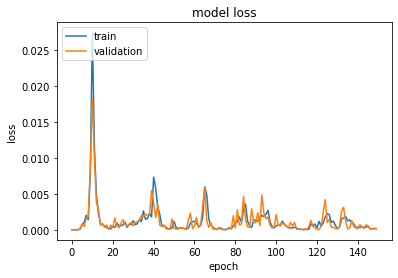

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = best_model.predict(x_test)

Text(0.5, 0.98, 'Predictions vs Actual data (FNN Regressor , n_neighbors = 10)')

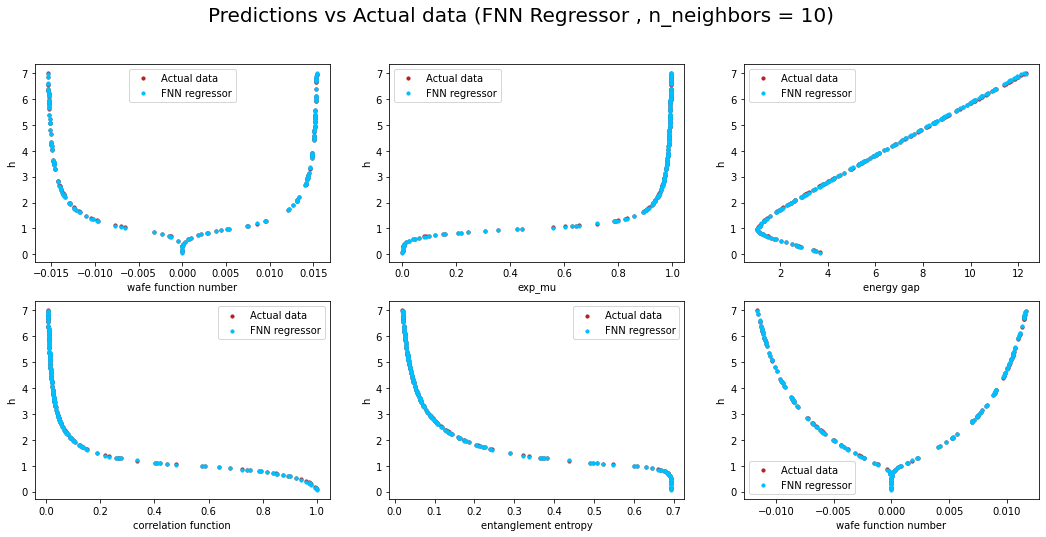

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (FNN Regressor , n_neighbors = 10)",fontsize = 20)

In [ ]:
y = best_model.predict(x)

In [ ]:
y

array([[5.06689493e-03],
       [2.31161639e-02],
       [1.88129265e-02],
       [2.45279670e-02],
       [4.07635644e-02],
       [4.41213250e-02],
       [2.66650822e-02],
       [8.11082274e-02],
       [6.78188503e-02],
       [9.26911384e-02],
       [1.00872636e-01],
       [1.09096006e-01],
       [1.18377626e-01],
       [1.27760679e-01],
       [1.23677194e-01],
       [1.33380115e-01],
       [1.55976757e-01],
       [1.52797118e-01],
       [1.62608594e-01],
       [1.84580773e-01],
       [1.94331661e-01],
       [2.04207629e-01],
       [2.02558428e-01],
       [2.24011630e-01],
       [2.22654209e-01],
       [2.32682168e-01],
       [2.42699802e-01],
       [2.64060885e-01],
       [2.74112999e-01],
       [2.72649705e-01],
       [2.82599092e-01],
       [2.92521924e-01],
       [3.02467465e-01],
       [3.12417984e-01],
       [3.22508186e-01],
       [3.44873160e-01],
       [3.54988277e-01],
       [3.53136092e-01],
       [3.63363981e-01],
       [3.85234296e-01],


In [ ]:
y[101]

array([1.0114782], dtype=float32)